<a href="https://colab.research.google.com/github/KseniiaKis/dz1/blob/main/dz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Описание задачи

Построить регрессионную модель для анализа факторов, влияющих на доходы фильмов в киноиндустрии, используя данные о бюджетах, жанрах, рейтингах, актерах, режиссерах и других характеристиках фильмов за период с 1986 по 2016 год.

In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from sklearn.impute import SimpleImputer

# 1. Прочитаем данные

In [81]:
url = "https://raw.githubusercontent.com/KseniiaKis/dz1/refs/heads/main/movies.csv"  # ссылка на мой датасет
data_raw = pd.read_csv(url)

Посмотрим на размеры таблицы: количество строк (каждая строка соответствует одному фильму) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [82]:
data_raw.shape

(7668, 15)

Сама таблица имеет вид:

In [4]:
data_raw

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


Информация о таблице:

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


▎Признаки данных:

• name: название фильма

• rating: рейтинг (R, PG-13 и т.д.)

• genre: жанр

• year: год выпуска

• released: дата выпуска

• score: оценка на IMDb

• votes: количество оценок пользователей IMDb

• director: режиссер

• writer: автор сценария

• star: главный актер/актриса

• country: рейтинг пользователей IMDb по странам

• budget: бюджет фильма

• gross: доход от фильма (целевой признак)

• company: компания, выпустившая фильм

• runtime: продолжительность фильма

▎Типы признаков:

• Номинальные (категориальные): name, company, genre, director, rating, country, star, writer.

• Количественные (числовые): budget, gross, score, votes, year, runtime.

▎Задача:

Предсказать количественный признак gross на основе остальных признаков.

Заменим тип `'Object'` на специальный, предназначенный для хранения категориальных значений:

In [83]:
data_raw['genre'] = data_raw['genre'].astype('category')
data_raw['company'] = data_raw['company'].astype('category')
data_raw['director'] = data_raw['director'].astype('category')
data_raw['rating'] = data_raw['rating'].astype('category')
data_raw['country'] = data_raw['country'].astype('category')
data_raw['star'] = data_raw['star'].astype('category')
data_raw['writer'] = data_raw['writer'].astype('category')
data_raw['name'] = data_raw['name'].astype('category')

In [8]:
data_raw.describe(include=['category'])

,name,rating,genre,director,writer,star,country,company
count,7668,7591,7668,7668,7665,7667,7665,7651
unique,7512,12,19,2949,4535,2814,59,2385
top,Hamlet,R,Comedy,Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3,3697,2245,38,37,43,5475,377


Имена строк (совпадают с номерами):

In [9]:
data_raw.index

RangeIndex(start=0, stop=7668, step=1)

# 2. Поиск и обработка пропущенных значений

In [84]:
data_raw.isnull()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [31]:
data_raw.isnull().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


In [32]:
[feature for feature in data_raw.columns if 0 < data_raw[feature].isnull().sum() ]

['rating',
 'released',
 'score',
 'votes',
 'writer',
 'star',
 'country',
 'budget',
 'gross',
 'company',
 'runtime']

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [85]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(data_raw[['budget', 'gross', 'runtime','votes', 'score']])
data_raw[['budget', 'gross', 'runtime','votes', 'score']] = imp_num.transform(data_raw[['budget', 'gross', 'runtime','votes', 'score']])

Заполним наиболее частыми значения в столбцах, соответствующих категориальным признакам:

In [86]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(data_raw[['rating', 'released', 'writer', 'star', 'country', 'company']])
data_raw[['rating', 'released', 'writer', 'star', 'country', 'company']] = imp_cat.transform(data_raw[['rating', 'released', 'writer', 'star', 'country', 'company']])

Проверим не осталось ли пустых значений:

In [87]:
data_raw.isnull()
data_raw.isnull().sum()

,0
name,0
rating,0
genre,0
year,0
released,0
score,0
votes,0
director,0
writer,0
star,0


# 3. Визуализация данных и вычисление основных характеристик



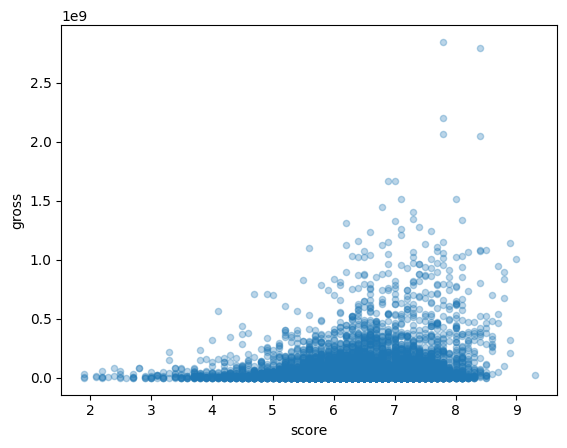

In [38]:
data_raw.plot(kind='scatter', x='score', y='gross', alpha = 0.3)
pass

Мы видим, что доход от фильма довольно сильно зависит от его оценки

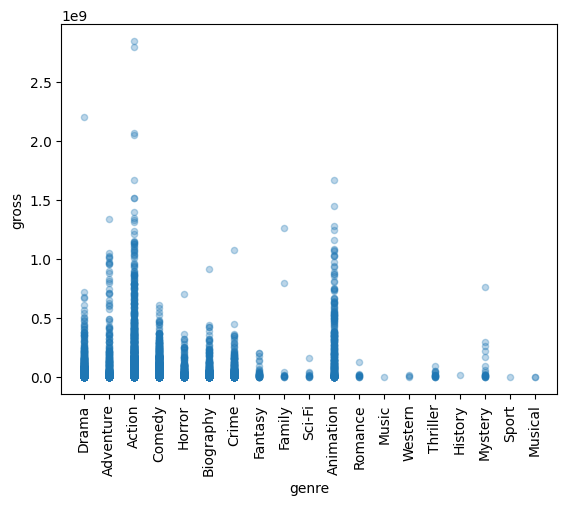

In [40]:
data_raw.plot(kind='scatter', x='genre', y='gross', alpha = 0.3)
plt.xticks(rotation = 90)
pass

Из этого графика видно, что доход от фильма так же зависит от его жанра

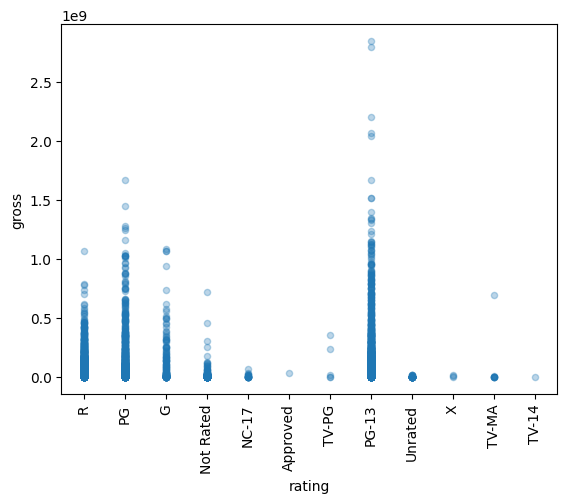

In [41]:
data_raw.plot(kind='scatter', x='rating', y='gross', alpha = .3)
plt.xticks(rotation = 90)
pass

Фильмы с рейтингом PG-13 и PG идеально подходят для семейного просмотра. Эти фильмы часто становятся самыми прибыльными, так как привлекают широкую аудиторию. Умеренный интерес также наблюдается к фильмам с рейтингами R и G. Это говорит о том, что наиболее успешные фильмы — это те, которые избегают насилия, оскорблений и изображений вредного образа жизни.

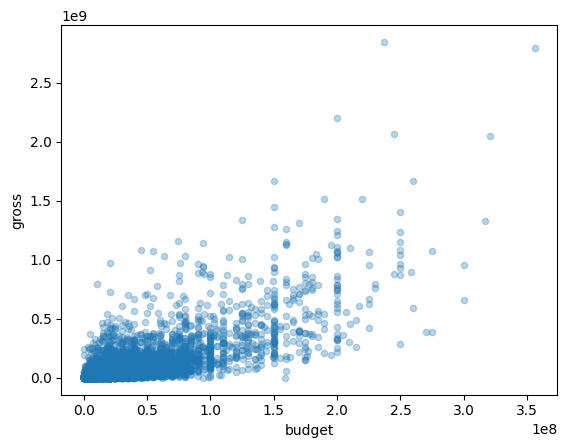

In [42]:
data_raw.plot(kind='scatter', x='budget', y='gross', alpha = .3)
pass

На диаграмме видно, что фильмы с бюджетом до 500 миллионов долларов обычно либо покрывают свои расходы, либо получают небольшую прибыль. Фильмы с бюджетом до 1.5 миллиарда долларов чаще всего не окупаются и уходят в минус. Самые прибыльные — это фильмы с бюджетом до 1 миллиарда долларов.

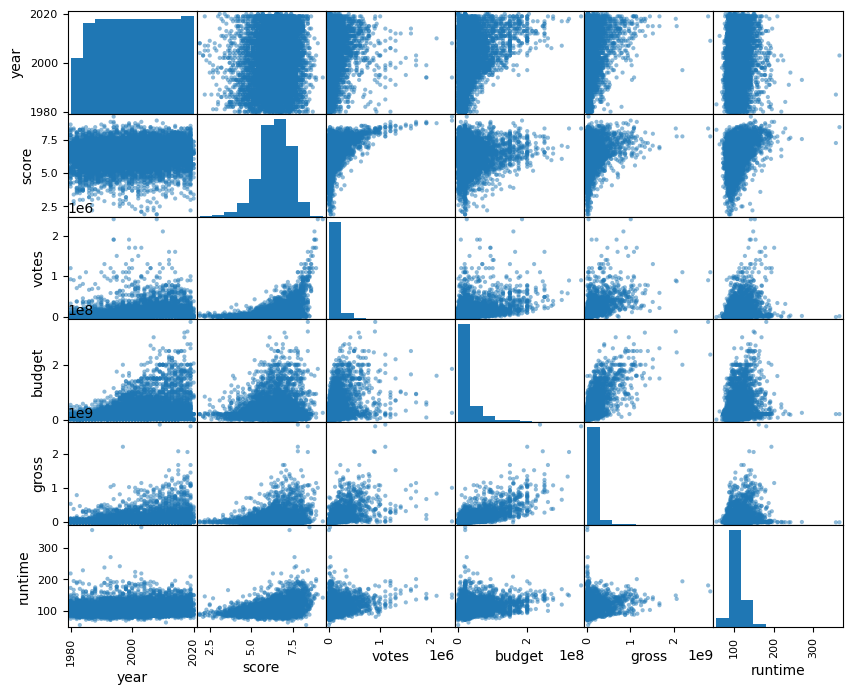

In [43]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 8))
pass

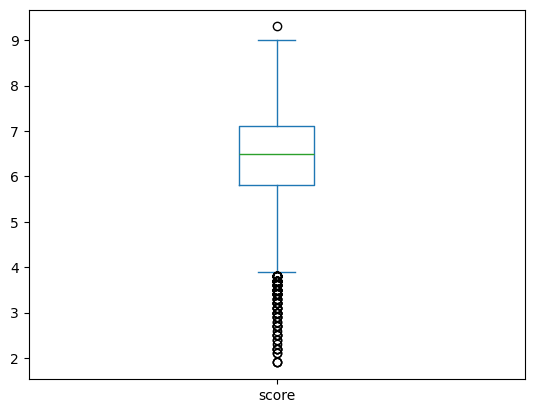

In [45]:
data_raw['score'].plot(kind='box')
pass

In [46]:
data_raw['score'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,score
0.005,3.1335
0.010,3.7000
0.050,4.7000
0.100,5.2000
0.500,6.5000
0.900,7.6000
0.950,7.8000
0.990,8.3000
0.995,8.4000


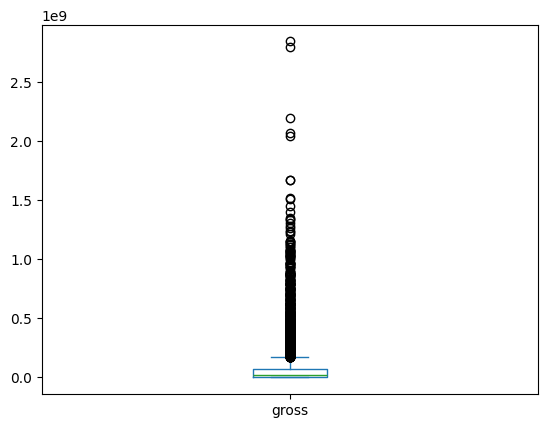

In [47]:
data_raw['gross'].plot(kind='box')
pass

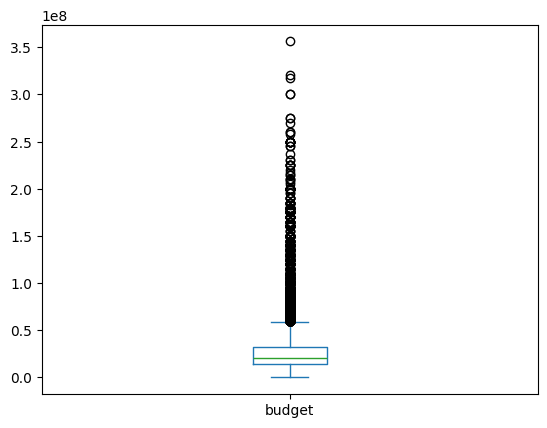

In [48]:
data_raw['budget'].plot(kind='box')
pass

In [49]:
data_raw['gross'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,gross
0.005,9.366375e+03
0.010,2.254318e+04
0.050,2.737085e+05
0.100,9.019156e+05
0.500,2.020576e+07
0.900,2.036326e+08
0.950,3.504034e+08
0.990,8.424955e+08
0.995,1.042058e+09


In [50]:
data_raw['budget'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,budget
0.005,140025.0
0.010,350000.0
0.050,2900000.0
0.100,5300000.0
0.500,20500000.0
0.900,70000000.0
0.950,100000000.0
0.990,185000000.0
0.995,203325000.0


In [51]:
rows_to_drop = data_raw[
    (data_raw['gross'] < data_raw['gross'].quantile(0.005)) | (data_raw['gross'] > data_raw['gross'].quantile(0.995)) |
    (data_raw['budget']  < data_raw['budget' ].quantile(0.005)) | (data_raw['budget']  > data_raw['budget' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(7527, 15)

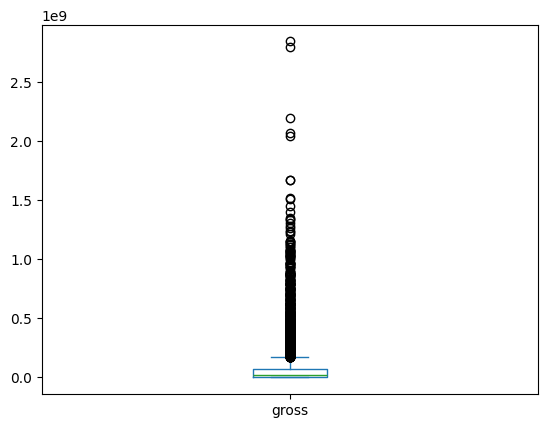

In [52]:
data_raw['gross'].plot(kind='box')
pass

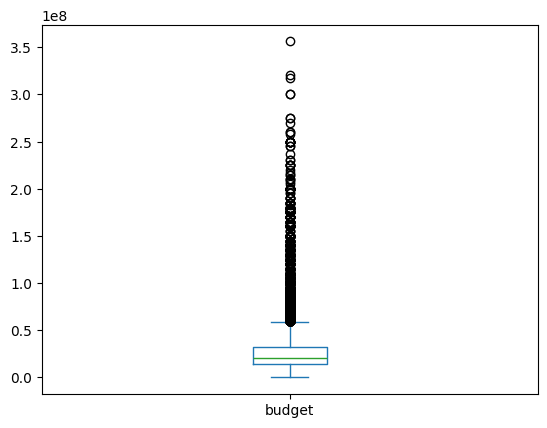

In [53]:
data_raw['budget'].plot(kind='box')
pass

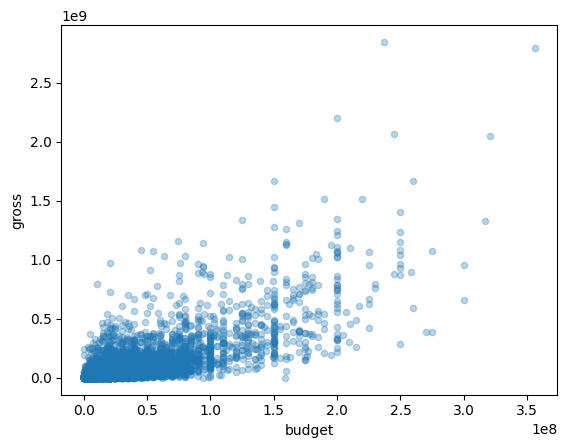

In [54]:
data_raw.plot(kind='scatter', x='budget', y='gross', alpha=.3)
pass

Построим матрицу кореляции:

In [55]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,year,score,votes,budget,gross,runtime
year,1.000000,0.095576,0.211819,0.281110,0.260709,0.110526
score,0.095576,1.000000,0.405853,0.035738,0.178705,0.399900
votes,0.211819,0.405853,1.000000,0.415211,0.630178,0.281297
budget,0.281110,0.035738,0.415211,1.000000,0.713291,0.226545
gross,0.260709,0.178705,0.630178,0.713291,1.000000,0.200286
runtime,0.110526,0.399900,0.281297,0.226545,0.200286,1.000000


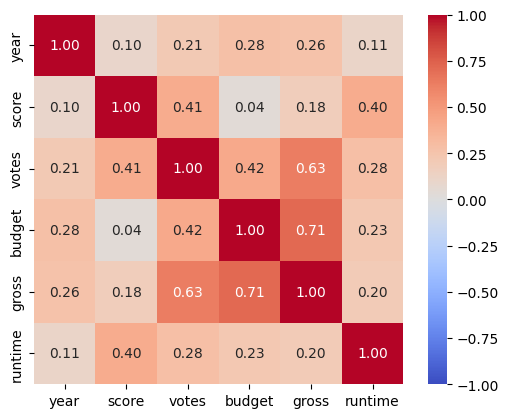

In [56]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Подготовка данных

In [99]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(data_raw[['rating', 'genre', 'director', 'writer', 'country', 'company']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [100]:
dummies = pd.DataFrame(enc.transform(data_raw[['rating', 'genre', 'director', 'writer', 'country', 'company']]),
                       columns=enc.get_feature_names_out(), index=data_raw.index)
dummies.head()

,rating_Approved,rating_G,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-MA,rating_TV-PG,...,company_Zoetrope Studios,company_Zucker Brothers Productions,company_Zupnik-Curtis Enterprises,company_double A Films,company_erbp,company_i am OTHER,company_i5 Films,company_iDeal Partners Film Fund,company_micro_scope,company_thefyzz
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
data_raw = pd.concat((data_raw, dummies), axis=1).drop(['rating', 'writer', 'country', 'company','genre','director'], axis=1)
data_raw.head()

,name,year,released,score,votes,star,budget,gross,runtime,rating_Approved,...,company_Zoetrope Studios,company_Zucker Brothers Productions,company_Zupnik-Curtis Enterprises,company_double A Films,company_erbp,company_i am OTHER,company_i5 Films,company_iDeal Partners Film Fund,company_micro_scope,company_thefyzz
0,The Shining,1980,"June 13, 1980 (United States)",8.4,927000.0,Jack Nicholson,19000000.0,46998772.0,146.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Blue Lagoon,1980,"July 2, 1980 (United States)",5.8,65000.0,Brooke Shields,4500000.0,58853106.0,104.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Star Wars: Episode V - The Empire Strikes Back,1980,"June 20, 1980 (United States)",8.7,1200000.0,Mark Hamill,18000000.0,538375067.0,124.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Airplane!,1980,"July 2, 1980 (United States)",7.7,221000.0,Robert Hays,3500000.0,83453539.0,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Caddyshack,1980,"July 25, 1980 (United States)",7.3,108000.0,Chevy Chase,6000000.0,39846344.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
X = data_raw.drop(['gross', 'released', 'name', 'star'], axis=1)
y = data_raw['gross']

Разбивание на обучающюю и тестовую

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, d = X_train.shape
N_test,  d = X_test.shape

N_train, N_test, d

(5751, 1917, 9964)

 Масштабирование количественных признаков

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [64]:
X_train.describe()

,year,score,votes,budget,runtime,rating_Approved,rating_G,rating_NC-17,rating_Not Rated,rating_PG,...,company_Zoetrope Studios,company_Zucker Brothers Productions,company_Zupnik-Curtis Enterprises,company_double A Films,company_erbp,company_i am OTHER,company_i5 Films,company_iDeal Partners Film Fund,company_micro_scope,company_thefyzz
count,5.751000e+03,5.751000e+03,5.751000e+03,5.751000e+03,5.751000e+03,5.751000e+03,5.751000e+03,5.751000e+03,5.751000e+03,5.751000e+03,...,5.751000e+03,5.751000e+03,5.751000e+03,5.751000e+03,5.751000e+03,5.751000e+03,5.751000e+03,5751.0,5751.0,5.751000e+03
mean,-3.867151e-15,-1.035359e-15,1.235512e-17,2.841677e-17,4.942047e-17,-1.235512e-18,1.544390e-17,1.976819e-17,-3.212330e-17,-1.111960e-17,...,2.471023e-18,-3.706535e-18,-3.706535e-18,-7.413070e-18,-6.177558e-18,-6.177558e-18,-8.648581e-18,0.0,0.0,-8.648581e-18
std,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,...,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,0.0,0.0,1.000087e+00
min,-1.850434e+00,-4.678678e+00,-5.412172e-01,-8.777449e-01,-2.824535e+00,-1.318761e-02,-1.396427e-01,-5.113768e-02,-1.951580e-01,-4.352607e-01,...,-2.949865e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,0.0,0.0,-1.318761e-02
25%,-8.588091e-01,-6.120857e-01,-4.842860e-01,-4.890004e-01,-6.616664e-01,-1.318761e-02,-1.396427e-01,-5.113768e-02,-1.951580e-01,-4.352607e-01,...,-2.949865e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,0.0,0.0,-1.318761e-02
50%,4.266771e-02,1.178155e-01,-3.430881e-01,-3.084732e-01,-1.750209e-01,-1.318761e-02,-1.396427e-01,-5.113768e-02,-1.951580e-01,-4.352607e-01,...,-2.949865e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,0.0,0.0,-1.318761e-02
75%,8.539968e-01,7.434451e-01,4.087106e-02,3.869453e-02,4.738398e-01,-1.318761e-02,-1.396427e-01,-5.113768e-02,-1.951580e-01,-4.352607e-01,...,-2.949865e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,-1.318761e-02,0.0,0.0,-1.318761e-02
max,1.755474e+00,3.037420e+00,1.432167e+01,8.037438e+00,1.399177e+01,7.582875e+01,7.161132e+00,1.955505e+01,5.124053e+00,2.297473e+00,...,3.389985e+01,7.582875e+01,7.582875e+01,7.582875e+01,7.582875e+01,7.582875e+01,7.582875e+01,0.0,0.0,7.582875e+01


# Обучение

**Случайный лес**

Выбор обусловлен личными предпочтениями


In [65]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=250)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250)

In [66]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

# Тест модели

In [67]:
# Масштабирование тестовой выборки:
X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X_test.columns, index=X_test.index)

In [68]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [71]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
Random Forest,29488618.367923,74941446.545393


In [72]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Random Forest', :] = (R2_train, R2_test)
R2_table

,train,test
Random Forest,0.966989,0.8025


Подбор гиперпараметра

In [92]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector
!pip install feature_engine
from feature_engine.selection import DropFeatures

In [104]:
from sklearn.model_selection import GridSearchCV
ppl = Pipeline([
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Обучение:
    ('fit', RandomForestRegressor())
])

In [105]:
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

(31146411.650080185, 76972217.39415583)

In [106]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_train, R2_test

(0.9631734804303187, 0.791650712707842)